In [1]:
import cv2
import numpy as np
import imutils

In [42]:
video='ball tracking//match.mp4'

In [43]:
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name

cap = cv2.VideoCapture(video)
cnt=0

In [44]:
# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video stream or file")

In [45]:
ret,first_frame = cap.read()

In [46]:
# Read until video is completed
while(cap.isOpened()):
    
    # Capture frame-by-frame
    ret, frame = cap.read()
     
    if ret == True:    
        #removing scorecard
        roi = frame[:800,:]

        #cropping center of an image
        thresh=600
        end = roi.shape[1] - thresh
        roi = roi[:,thresh:end]

        cv2.imshow("image",roi)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

        cv2.imwrite('frames//'+str(cnt)+'.png',roi)
        cnt=cnt+1

    # Break the loop
    else: 
        break

cv2.destroyAllWindows()

## Reading Frames

In [47]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import re

#listing down all the file names
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

#reading frames
images_orig=[]
for i in frames:
    img = cv2.imread('frames/'+i)
    images_orig.append(img)

images_orig=np.array(images_orig)

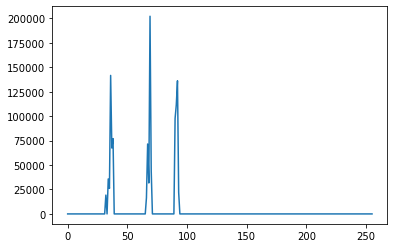

In [48]:
histogram = cv2.calcHist([images_orig],[0],None,[256],[0,256])
plt.plot(histogram)

In [288]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import re

#listing down all the file names
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

#reading frames
images=[]
for i in frames:
    img = cv2.imread('frames/'+i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(25,25),0)
    images.append(img)

images=np.array(images)

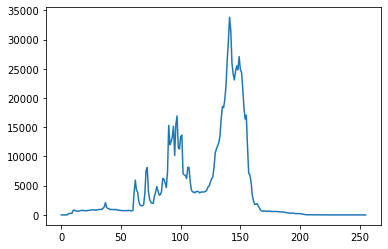

In [50]:
histogram = cv2.calcHist([images],[0],None,[256],[0,256])
plt.plot(histogram)

In [51]:
images.shape

(1375, 800, 720)

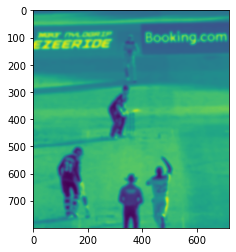

In [52]:
plt.imshow(images[1])

### As our objective is to track the ball on the pitch, we need to extract the frames that contain the pitch. Here, I am using the concept of scene detection to accomplish the task:

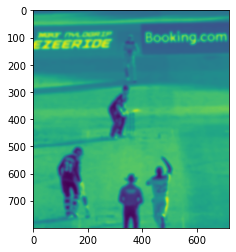

In [53]:
plt.imshow(images[1])

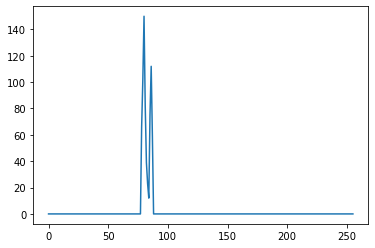

In [54]:
histogram = cv2.calcHist(images[1],[0],None,[256],[0,256])
plt.plot(histogram)

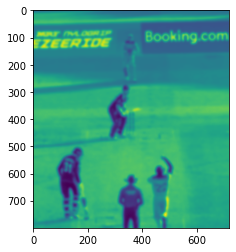

In [55]:
plt.imshow(images[2])

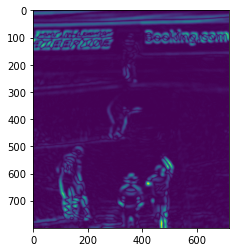

In [56]:
mask = cv2.absdiff(images[1],images[2])
plt.imshow(mask)

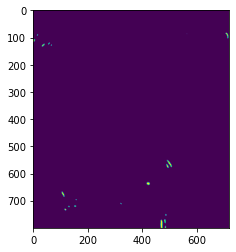

In [57]:
_ , mask = cv2.threshold(mask, 50, 255, cv2.THRESH_BINARY)
plt.imshow(mask)

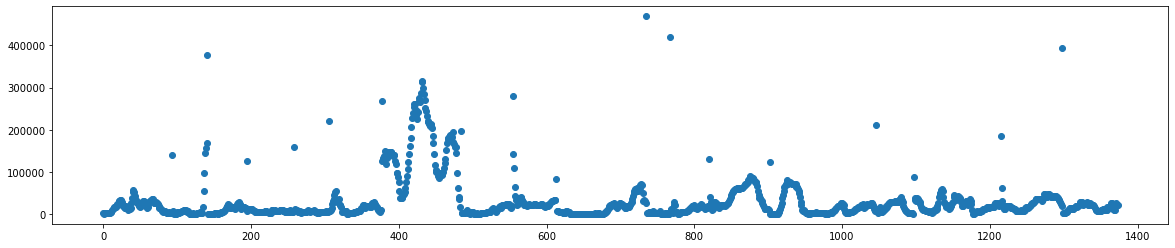

In [82]:
nonzero=[]
for i in range((len(images)-1)):
    
    mask = cv2.absdiff(images[i],images[i+1])
    _ , mask = cv2.threshold(mask, 50, 255, cv2.THRESH_BINARY)
    num = np.count_nonzero((mask.ravel()))
    nonzero.append(num)
    
    
x = np.arange(0,len(images)-1)
y = nonzero

plt.figure(figsize=(20,4))
plt.scatter(x,y)

### The outlier in the plot indicates the frame number during which the scene changes. So, fix the threshold for obtaining the frames before a scene change:

In [238]:
# thresh_1 = 200000
thresh_1 = 300000
frame_change=[]
for i in range (len(images)-1):
    if(nonzero[i]>thresh_1): 
        frame_change.append(i)
#         scene_change_idx = i
#         break
        
# frames = frames[:(scene_change_idx+1)]

In [287]:
print(len(frame_change))
len(frames)

6


142

In [240]:
frame_change

[141, 431, 432, 735, 767, 1298]

In [289]:
final_output=[]
frame_name=[]
for i in frame_change:
    temp=[]
    for j in range (i,i+120):
        try:
            temp.append(images_orig[j])
            frame_name.append(frames[j])
        except:
            break
    final_output.extend([temp])

In [255]:
# final_output = np.array(final_output)
print(type(final_output))
print(final_output[0][0].shape)
# plt.imshow(final_output[1][1])
len(final_output)

<class 'list'>
(800, 720, 3)


6

In [261]:
frameSize=(720,800)
# out = cv2.VideoWriter('test.avi',cv2.VideoWriter_fourcc(*'DIVX'), 40, frameSize)
x=0
for j in final_output:
    out = cv2.VideoWriter('test'+str(x)+'.avi',cv2.VideoWriter_fourcc(*'DIVX'), 40, frameSize)
    x+=1
    for i in range(len(j)):
        out.write(j[i])
    out.release()

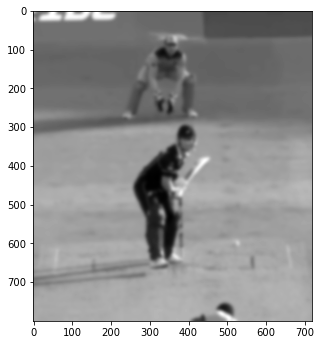

In [316]:
img= cv2.imread('frames/' + frame_name[35])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(25,25),0)

plt.figure(figsize=(5,10))
plt.imshow(gray,cmap='gray')

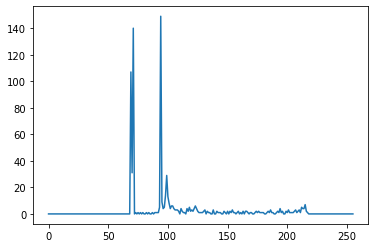

In [317]:
histogram = cv2.calcHist(gray,[0],None,[256],[0,256])
plt.plot(histogram)

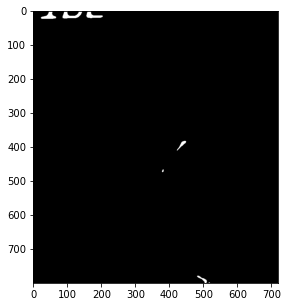

In [318]:
_ , mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5,5))
plt.imshow(mask,cmap='gray')

In [306]:
contours,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

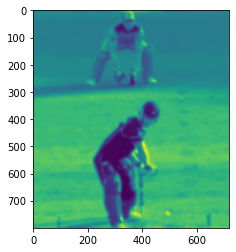

In [307]:
img_copy = np.copy(gray)
plt.imshow(img_copy,)

In [308]:
contours = np.array(contours)

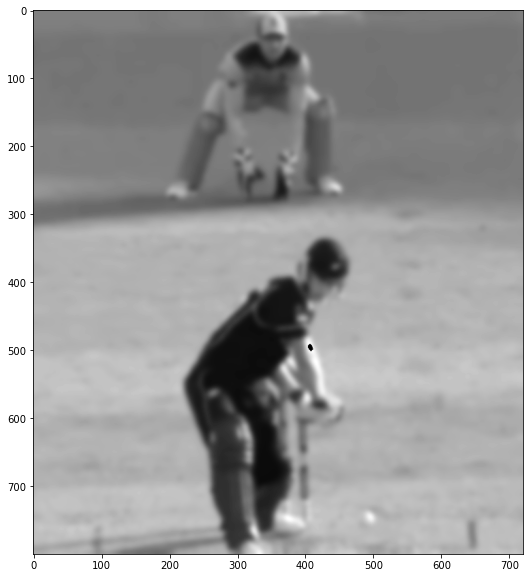

In [309]:
cv2.drawContours(img_copy, contours, -1, (0,255,0), 3)
plt.figure(figsize=(10,10))
plt.imshow(img_copy, cmap='gray')
